In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brands
from latex_conf import build_latex_confusion_matrix

import util

In [2]:
base_path_phish = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k"
base_path_benign = "../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k"

In [4]:
df_phish = pd.read_csv("result_v2.txt", sep="\t")
df_phish["is_phish"] = 1
df_benign = pd.read_csv("result_v2_benign.txt", sep="\t")
df_benign["is_phish"] = 0

df_phish = df_phish[df_phish['true_brand'].isin(brands.brands)]
df_benign = df_benign.iloc[:19000, :]

df = df_phish.append(df_benign, ignore_index=True)

df_phish_old = df_phish
df_phish["phish_category"] = np.where(df_phish['true_brand'] == df_phish['pred_brand'], 1, 0)
df_rec = df_phish.append(df_benign, ignore_index=True)

/tmp/ipykernel_120502/1529288812.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_phish.append(df_benign, ignore_index=True)
/tmp/ipykernel_120502/1529288812.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_rec = df_phish.append(df_benign, ignore_index=True)


In [4]:
print(f"Phishing sites: {df_phish.shape}")
print(f"Legit sites: {df_benign.shape}")
print(f"Dataframe sites: {df.shape}")

Phishing sites: (18432, 7)
Legit sites: (19000, 7)
Dataframe sites: (37432, 7)


In [5]:
confusion_matrix = pd.crosstab(df['is_phish'], df['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)
confusion_matrix_rec = pd.crosstab(df_rec['is_phish'], df_rec['phish_category'], rownames=['Actual'], colnames=['Predicted'], margins=True)

In [6]:
confusion_matrix

Predicted,0,1,All
Actual,,,
0,11446,7554,19000
1,10453,7979,18432
All,21899,15533,37432


In [7]:
confusion_matrix_rec

Predicted,0,1,All
Actual,,,
0,11446,7554,19000
1,16897,1535,18432
All,28343,9089,37432


In [8]:
util.precision_sensitivity(confusion_matrix, confusion_matrix_rec)

Precision: 0.5136805510847873, Precision brand: 0.16888546594784906
Sensitivity: 0.4328884548611111, Sensitivity brand: 0.0832790798611111


# Error Details

## False Negatives

In [9]:
fn = df[(df['phish_category'] == 0) & (df['is_phish'] == 1)]
print(fn.shape)

(10453, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-05-25-08`37`25/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Facebook, Inc.+2020-09-08-13`14`38/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Webmail Providers+2020-08-21-10`03`57/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-08-30-14`20`56/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/IRS+2020-07-18-13`21`30/shot.png']

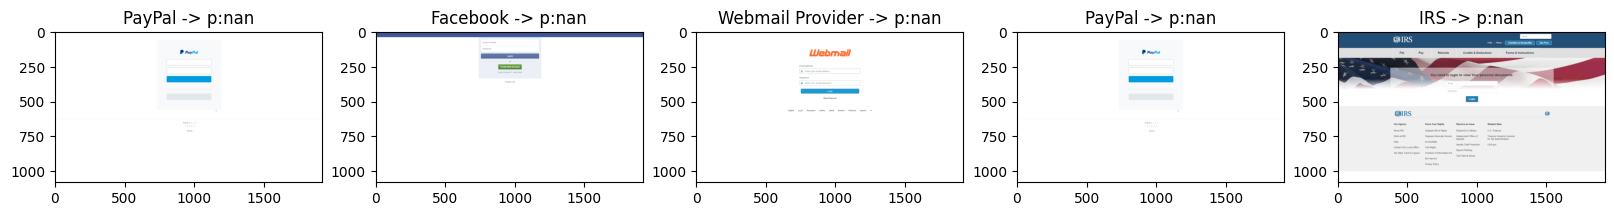

In [10]:
util.print_some_errors(fn, base_path_phish)

## False Positives

In [11]:
fp = df[(df['phish_category'] == 1) & (df['is_phish'] == 0)]
print(fp.shape)

(7554, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/stmcu.com.cn/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/truebill.com/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/vectorindia.org/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/video.blog/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/benign_sample_30k/mycyberteller.com/shot.png']

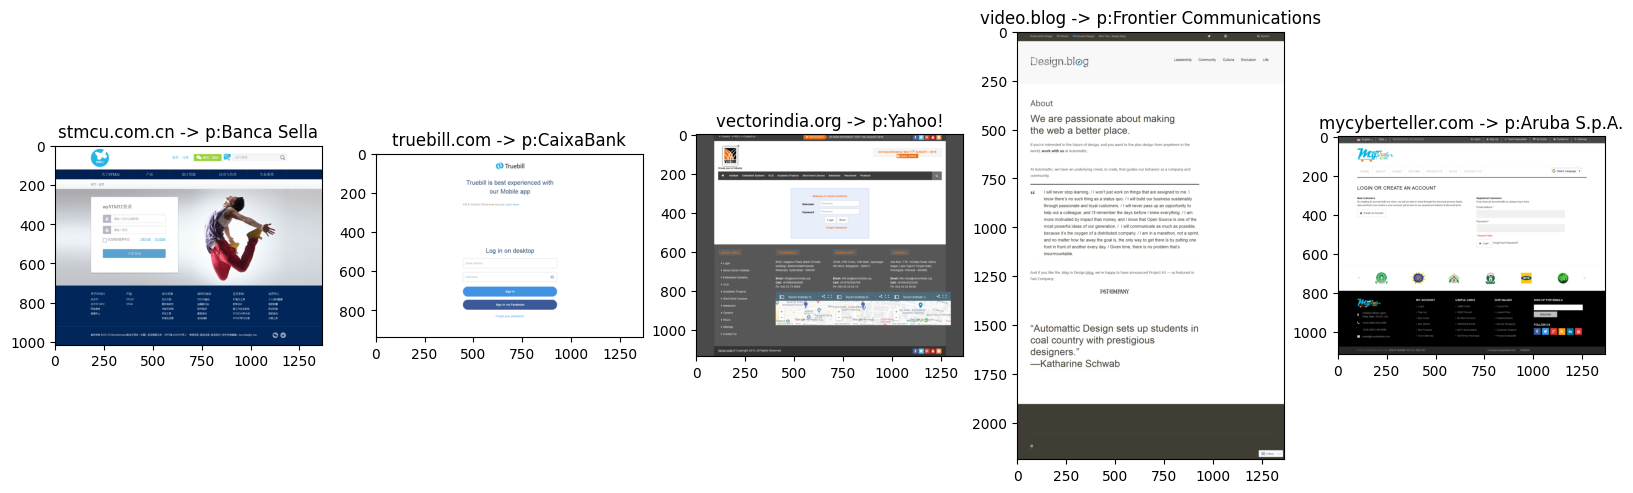

In [19]:
util.print_some_errors(fp, base_path_benign)

## True Positive - False Brand detection

In [13]:
brand_err = df_phish_old[(df_phish_old['true_brand'] != df_phish_old['pred_brand']) & df_phish_old['pred_brand']]
print(brand_err.shape)

(6444, 7)


['../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/PayPal Inc.+2020-09-08-11`32`04/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Adobe Inc.+2020-08-20-12`47`12/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/eBay Inc.+2020-07-28-21`39`29/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Bank of America+2019-08-18-13`13`34/shot.png',
 '../../PHISHPEDIA/Phishpedia/phishpedia/datasets/phish_sample_30k/Wells Fargo & Company+2020-06-18-21`20`13/shot.png']

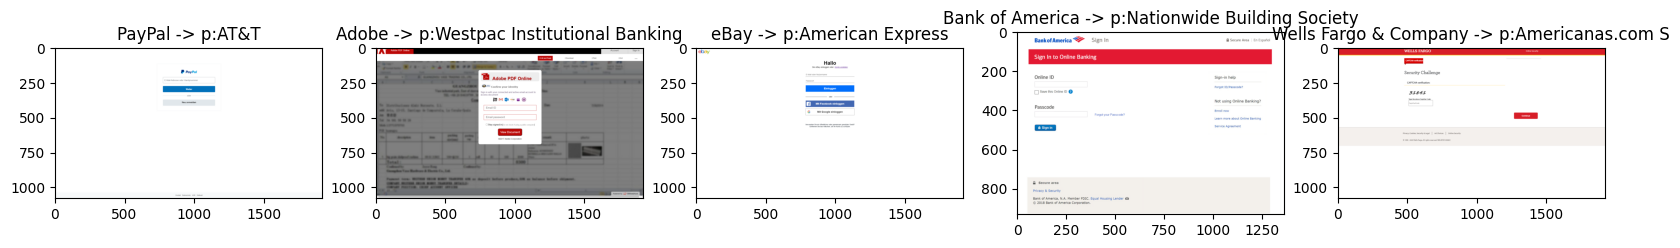

In [14]:
util.print_some_errors(brand_err, base_path_phish)

In [15]:
examples_fn = [
    "phish_sample_30k/Instagram+2020-08-18-10`45`48/shot.png",
    "phish_sample_30k/WeTransfer+2020-05-29-12`53`50/shot.png",
    "phish_sample_30k/Orange+2020-09-24-19`16`09/shot.png",
    "phish_sample_30k/Chase Personal Banking+2020-08-18-13`05`21/shot.png",
    "phish_sample_30k/Global Sources (HK)+2020-07-20-13`02`55/shot.png",
    "phish_sample_30k/Bank of America+2020-08-13-19`32`30/shot.png",
    "phish_sample_30k/Webmail Providers+2020-06-08-09`49`15/shot.png",
    "phish_sample_30k/GoDaddy+2019-08-20-12`41`23/shot.png"
]

examples_fp = [
    "benign_sample_30k/tvn.pl/shot.png",
    "benign_sample_30k/megapixel.cz/shot.png",
    "benign_sample_30k/jumoreglobal.com/shot.png",
    "benign_sample_30k/galianostore.com/shot.png",
    "benign_sample_30k/cubecraft.net/shot.png",
    "benign_sample_30k/northernbrewer.com/shot.png",
    "benign_sample_30k/thinkorswim.com/shot.png",
    "benign_sample_30k/ksk-melle.de/shot.png"
]

examples_false_brand = [
    "phish_sample_30k/WeTransfer+2019-10-23-05`51`44/shot.png",
    "phish_sample_30k/WhatsApp+2020-09-14-16`05`03/shot.png",
    "phish_sample_30k/Blockchain+2020-08-25-12`26`50/shot.png",
    "phish_sample_30k/AT&T Inc.+2020-07-14-11`18`23/shot.png",
    "phish_sample_30k/WeTransfer+2019-10-19-11`45`07/shot.png",
    "phish_sample_30k/Mastercard International Incorporated+2020-09-12-12`01`42/shot.png",
    "phish_sample_30k/Orange+2020-09-15-12`59`07/shot.png",
    "phish_sample_30k/Adobe Inc.+2020-05-10-18`21`05/shot.png"
]

# Statistic for Latex

In [16]:
print(build_latex_confusion_matrix(confusion_matrix))

\def \cTP {7979}
\def \cFP {7554}
\def \cTN {11446}
\def \cFN {10453}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {15533}
\def \cFpN {21899}
\def \ctotal {37432}
\def \cPPV {51.4\%}
\def \cTPR {43.3\%}
\def \cACC {51.9\%}



In [17]:
print(build_latex_confusion_matrix(confusion_matrix_rec))

\def \cTP {1535}
\def \cFP {7554}
\def \cTN {11446}
\def \cFN {16897}
\def \ctiP {18432}
\def \ctiN {19000}
\def \ctpP {9089}
\def \cFpN {28343}
\def \ctotal {37432}
\def \cPPV {16.9\%}
\def \cTPR {8.3\%}
\def \cACC {34.7\%}



In [5]:
df_correct = df_phish[df_phish['true_brand'] == df_phish['pred_brand']]
df_not_correct = df_phish[df_phish['true_brand'] != df_phish['pred_brand']]
df_pred_brands_benign = df_benign[df_benign['true_brand'] != df_benign['pred_brand']]

brands_correct = df_correct.value_counts(["true_brand"]).to_frame(name="count")
brands_not_correct = df_not_correct.value_counts(["true_brand"]).to_frame(name="count")
brands_benign_pred = df_pred_brands_benign.value_counts(["pred_brand"]).to_frame(name="count")

pd.set_option('display.max_rows', df.shape[0]+1)

# Correct predicted brands in phishing screenshots
brands_correct

,count
true_brand,
Amazon,632
LinkedIn Corporation,108
1&1 Ionos,87
Bank of America,69
ASB Bank Limited,65
Facebook,54
Credit Agricole S.A,51
Steam,42
Orange,38


In [4]:
# Wrong predicted brands in phishing pages
brands_not_correct

,count
true_brand,
PayPal,4806
Chase Personal Banking,1057
Facebook,939
Netflix,731
Apple,585
Bank of America,584
Adobe,455
LinkedIn Corporation,393
Dropbox,370


In [5]:
# Predicted brands in benign list where nothing should be predicted
brands_benign_pred

,count
pred_brand,
AutoScout24,269
Equa bank,256
Telstra Corporation Limited,254
American Express,198
Bank of America,189
Frontier Communications,173
Google,163
Facebook,151
LinkedIn Corporation,148


In [6]:
# Brands in phish_list
brands_phish = df_phish.value_counts(["true_brand"]).to_frame(name="count")
brands_phish

,count
true_brand,
PayPal,4811
Chase Personal Banking,1085
Facebook,993
Amazon,807
Netflix,747
Bank of America,653
Apple,585
LinkedIn Corporation,501
Adobe,455


<AxesSubplot: xlabel='brand'>

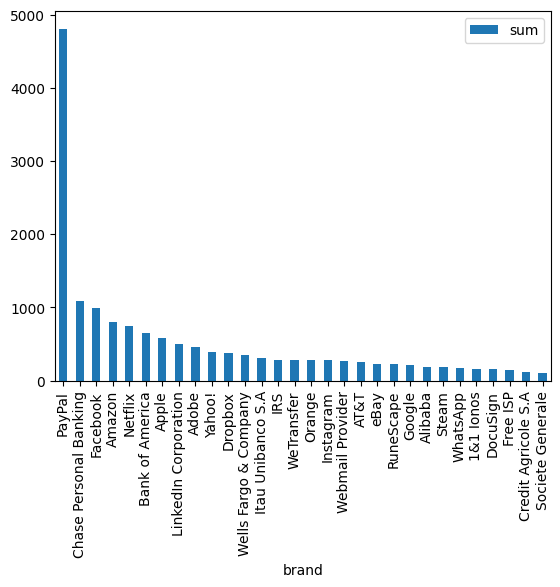

In [20]:
bp = brands_phish.reset_index()
bp.columns = ["brand", "sum"]
bp.to_csv(r'brands_count.csv', index=False)
bp.iloc[:30].plot.bar(x="brand", y="sum")

In [19]:
with open("brands_count.txt", "w") as f:
    f.write("\\textbf{Marke} & \\textbf{Anzahl} \\\\ \\hline\n")
    for t in bp.iterrows():
        f.write(f"{t[1]['brand']} & {t[1]['sum']} \\\\ \\hline\n")

In [26]:
#brands_not_correct.index.name = "true_brand"
#bnc = brands_not_correct.reset_index()
bp_diff = pd.merge(bp, brands_not_correct, how="inner", left_on="brand", right_on="true_brand")
bp_diff.columns = ["brand", "sum", "not_detected"]
bp_diff

,brand,sum,not_detected
0,PayPal,4811,4806
1,Chase Personal Banking,1085,1057
2,Facebook,993,939
3,Amazon,807,175
4,Netflix,747,731
5,Bank of America,653,584
6,Apple,585,585
7,LinkedIn Corporation,501,393
8,Adobe,455,455
9,Yahoo!,385,370


<AxesSubplot: xlabel='brand'>

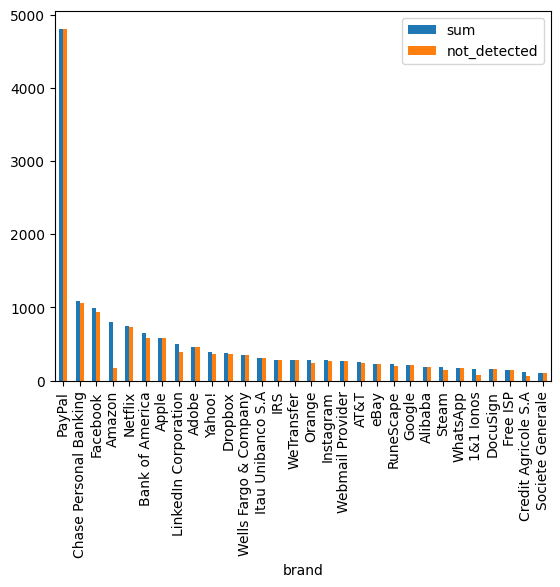

In [29]:
bp_diff.to_csv(r'brands_detected.csv', index=False)
bp_diff.iloc[:30].plot.bar(x="brand")